## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

## Préparation du dataset

### 1.0 Chargement des données

In [2]:
from constants import DATA_PATH

def create_pokedex() -> pd.DataFrame:
    return pd.read_csv(DATA_PATH)

In [3]:
pokedex = create_pokedex()
pokedex

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65.0,65,45,grass,poison,6.9,1.0,0.0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80.0,80,60,grass,poison,13.0,1.0,0.0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122.0,120,80,grass,poison,100.0,1.0,0.0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60.0,50,65,fire,NaN,8.5,1.0,0.0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80.0,65,80,fire,NaN,19.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,"['Water Absorb', 'Strong Jaw']",0.50,NaN,1.0,0.5,0.5,1.0,2.0,0.5,NaN,...,80.0,901,130.0,110,NaN,water,dragon,45.5,8.0,NaN
803,"['Rough Skin', 'Sand Rush']",0.25,0.5,NaN,1.0,NaN,1.0,NaN,0.5,1.0,...,NaN,902,NaN,100,55,ground,dragon,NaN,NaN,NaN
804,"['Contrary', 'Suction Cups', 'Infiltrator']",4.00,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,50.0,687,68.0,75,73,dark,psychic,47.0,6.0,0.0
805,"['Swift Swim', 'Storm Drain', 'Water Veil']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,50.0,456,49.0,61,66,water,NaN,7.0,4.0,0.0


In [4]:
pokedex.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65.0,65,45,grass,poison,6.9,1.0,0.0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80.0,80,60,grass,poison,13.0,1.0,0.0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122.0,120,80,grass,poison,100.0,1.0,0.0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60.0,50,65,fire,NaN,8.5,1.0,0.0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80.0,65,80,fire,NaN,19.0,1.0,0.0


### 1.1 Suppression des colonnes non pertinentes

In [5]:
def filter_columns(df: pd.DataFrame) -> None:
    keep_list = ["name", "type1", "type2", "attack", "defense", "sp_attack", "sp_defense", "hp", "speed","generation", "is_legendary"]
    for header in df.head():
        if header not in keep_list:
            df.drop(header, axis='columns', inplace= True)
    return df

In [6]:
filter_columns(pokedex)
pokedex

,attack,defense,hp,name,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1.0,0.0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1.0,0.0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1.0,0.0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1.0,0.0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
802,110.0,120,NaN,HydroFang,130.0,110,NaN,water,dragon,8.0,NaN
803,NaN,100,75,TerraClaw,NaN,100,55,ground,dragon,NaN,NaN
804,92.0,88,86,Malamar,68.0,75,73,dark,psychic,6.0,0.0
805,49.0,56,49,Finneon,49.0,61,66,water,NaN,4.0,0.0


### 1.2 Renommage des colonnes restantes


In [7]:
def rename_columns(df: pd.DataFrame) -> None:
    df.rename(columns = {'attack' : 'Attack', 'defense': 'Defense', 'hp' : 'HP', 'name' : 'Name',
                          'sp_attack' : 'Special Attack', 'sp_defense' : 'Special Defense',
                          'speed' : 'Speed', 'type1':'Primary Type', 'type2':'Secondary Type', 
                          'generation' : 'Generation', 'is_legendary': 'Legendary'}, inplace=True)
    return df

In [8]:
rename_columns(pokedex)
pokedex

,Attack,Defense,HP,Name,Special Attack,Special Defense,Speed,Primary Type,Secondary Type,Generation,Legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1.0,0.0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1.0,0.0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1.0,0.0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1.0,0.0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
802,110.0,120,NaN,HydroFang,130.0,110,NaN,water,dragon,8.0,NaN
803,NaN,100,75,TerraClaw,NaN,100,55,ground,dragon,NaN,NaN
804,92.0,88,86,Malamar,68.0,75,73,dark,psychic,6.0,0.0
805,49.0,56,49,Finneon,49.0,61,66,water,NaN,4.0,0.0


### 1.3. Nettoyage des données

In [9]:
def clean_data(df: pd.DataFrame) -> None:
    df.drop_duplicates(inplace=True)
    df.dropna(axis = 0, subset= [i for i in df.columns if i != 'Secondary Type'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [10]:
clean_data(pokedex)
pokedex

,Attack,Defense,HP,Name,Special Attack,Special Defense,Speed,Primary Type,Secondary Type,Generation,Legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1.0,0.0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1.0,0.0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1.0,0.0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1.0,0.0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
796,101.0,103,97,Celesteela,107.0,101,61,steel,flying,7.0,1.0
797,181.0,131,59,Kartana,59.0,31,109,grass,steel,7.0,1.0
798,101.0,53,223,Guzzlord,97.0,53,43,dark,dragon,7.0,1.0
799,107.0,101,97,Necrozma,127.0,89,79,psychic,NaN,7.0,1.0


In [11]:
# Permet de vérifier les types de chaque colonne
# TODO: Décommenter la ligne suivante lorsque vous avez terminé la fonction clean_data
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attack           801 non-null    float64
 1   Defense          801 non-null    int64  
 2   HP               801 non-null    object 
 3   Name             801 non-null    object 
 4   Special Attack   801 non-null    float64
 5   Special Defense  801 non-null    int64  
 6   Speed            801 non-null    object 
 7   Primary Type     801 non-null    object 
 8   Secondary Type   417 non-null    object 
 9   Generation       801 non-null    float64
 10  Legendary        801 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 69.0+ KB


### 1.4 Correction des types de données

In [12]:
def correct_columns_types(df) -> None:
    df[['Generation', 'HP', 'Speed', 'Legendary']] = df[['Generation', 'HP', 'Speed', 'Legendary']].astype(int)
    return df

In [13]:
correct_columns_types(pokedex)
pokedex

,Attack,Defense,HP,Name,Special Attack,Special Defense,Speed,Primary Type,Secondary Type,Generation,Legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1,0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1,0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1,0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1,0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...
796,101.0,103,97,Celesteela,107.0,101,61,steel,flying,7,1
797,181.0,131,59,Kartana,59.0,31,109,grass,steel,7,1
798,101.0,53,223,Guzzlord,97.0,53,43,dark,dragon,7,1
799,107.0,101,97,Necrozma,127.0,89,79,psychic,NaN,7,1


In [14]:
# Permet de vérifier que les types des colonnes ont bien été corrigés
# TODO: Décommenter la ligne suivante lorsque vous avez terminé la fonction correct_columns_types
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attack           801 non-null    float64
 1   Defense          801 non-null    int64  
 2   HP               801 non-null    int32  
 3   Name             801 non-null    object 
 4   Special Attack   801 non-null    float64
 5   Special Defense  801 non-null    int64  
 6   Speed            801 non-null    int32  
 7   Primary Type     801 non-null    object 
 8   Secondary Type   417 non-null    object 
 9   Generation       801 non-null    int32  
 10  Legendary        801 non-null    int32  
dtypes: float64(2), int32(4), int64(2), object(3)
memory usage: 56.4+ KB


## Visualisation de données

### 1.5 Le Spectre des Types

In [15]:
def display_types_pie_chart(df: pd.DataFrame) -> None:
# Creation des listes de donnees pour le pie chart
    filtered_df = df['Primary Type'].value_counts()
    # output => dataframe avec une colonne du Type Primaire et une autre avec l'occurence
    
# Creation du pie chart
    fig = px.pie(values = filtered_df.values, names = filtered_df.index, title = 'Distribution des Types Primaires de Pokémon', width=800, height=600)
    fig.update_traces(textinfo='percent+label')
    return fig
    
display_types_pie_chart(pokedex)

### 1.6 La Course aux Légendes

C:\Users\philu\AppData\Local\Temp\ipykernel_9140\2339781428.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Nombre de Pokémon Légendaire par Génération'}, xlabel='Génération', ylabel='Nombre de Pokémon Légendaires'>

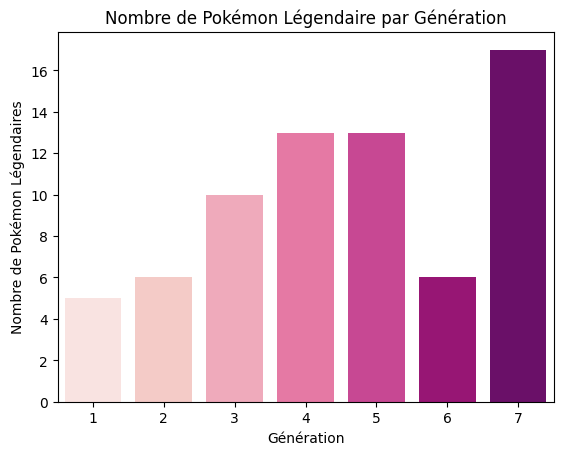

In [16]:
def display_lengends_hist(df: pd.DataFrame) -> None:
    # Filtration des donnees; determine le nombre de legendaire selon la generation
    filtered_df = df.groupby('Generation')['Legendary'].sum()
    # output =>
    """
        Generation
        1     5
        2     6
        3    10
        4    13
        5    13
        6     6
        7    17
    """
    ###
    # Creation de l'histogramme/graphique a bande verticale
    plt.xlabel('Génération')
    plt.ylabel('Nombre de Pokémon Légendaires')
    plt.title('Nombre de Pokémon Légendaire par Génération')

    fig = sns.barplot(filtered_df, palette= "RdPu", legend= False)
    # fig.update_layout(width=600, height=400)
    return fig
display_lengends_hist(pokedex)

### 1.7 L'Ascension Générationnelle

In [17]:
def display_stats_evolution(df: pd.DataFrame) -> None:
    # Filtration des donnees selon la generation
    stat = ['Attack', 'Defense', 'HP', 'Special Attack', 'Special Defense', 'Speed']
    filtered_df = df.groupby('Generation')[stat].mean()
    # output =>
    """
            Attack	Defense	HP	Special Attack	Special Defense	Speed
    Generation						
    1	74.529801	70.079470	64.344371	69.403974	67.741722	70.152318
    2	69.960000	71.790000	70.980000	65.400000	73.440000	61.610000
    ...
    """
    # Creation du graphique en lignes superposees
    fig = px.line(filtered_df, title= 'Évolution des Statistiques Moyennes par Génération')
    fig.update_xaxes(title_text='Génération')
    fig.update_yaxes(title_text='Statistique Moyenne')
    fig.update_layout(width=1500, height=400)
    fig.update_traces(mode= 'lines+markers')

    return fig

display_stats_evolution(pokedex)

### 1.8 Le Radar des Éléments


In [18]:
def display_types_radar_charts(df: pd.DataFrame) -> None:
    stat = ['Attack','Defense', 'HP']
# Filtration des donnees selon les stats demandees
    filtered_df = df.groupby('Primary Type')[stat].mean()
    # output =>
    """"
            Attack	    Defense	    HP
    Primary Type			
    bug 	70.125000	70.847222	56.722222
    dark	87.793103	70.517241	72.551724
    ...
    """
# Creation des sub_plots
    fig = make_subplots(rows = 1, cols = 3, specs=[[{"type": "polar"}, {"type": "polar"},{"type": "polar"}]], subplot_titles= ['Attaque', 'Défense', 'HP'])

# Creation des 3 graphiques radars
    for i, column in enumerate(stat, start= 1):
        fig.add_trace(go.Scatterpolar(r= filtered_df[column], theta= filtered_df.index, fill='toself', name= column), row= 1, col=i)

# Ajustement des graphiques radars et ajout des informations supplementaires
    fig.update_layout(width=1400, height=600, title_text = 'Radar Charts des statistiques moyennes par type de Pokémon')

    return fig

display_types_radar_charts(pokedex)

## Filtrage, tri et agrégation

### 1.9 Le Panthéon des Spécialistes

In [19]:
from IPython.display import display

def display_best_pokemon(df: pd.DataFrame) -> None:
    filter_list = ['Attack', 'Defense', 'HP', 'Speed']
# Creation des tableaux et des sous titres
    for i in filter_list:
        filtered_df = df.sort_values(by = [i], ascending=(False)).head(5).set_index(pd.Index([1,2,3,4,5]))

    # Affichage des tableaux et sous titres
        print(f'Meilleurs Pokémon pour {i}')
        display(filtered_df[['Name', i]])
        
    # Attention! Pour Speed, l'egalite des valeurs semble amener des erreurs, mais je ne sais pas quelle est le deuxieme critere
    #   de classement. Pour le Nom Alphabetique: by = [i, 'Name'], ascending= (False, True); pour une valeur du tableau: by = [i, valeur], ascending= (True, True)
display_best_pokemon(pokedex)

Meilleurs Pokémon pour Attack


,Name,Attack
1,Heracross,185.0
2,Kartana,181.0
3,Groudon,180.0
4,Rayquaza,180.0
5,Garchomp,170.0


Meilleurs Pokémon pour Defense


,Name,Defense
1,Aggron,230
2,Shuckle,230
3,Steelix,230
4,Regirock,200
5,Avalugg,184


Meilleurs Pokémon pour HP


,Name,HP
1,Blissey,255
2,Chansey,250
3,Guzzlord,223
4,Zygarde,216
5,Wobbuffet,190


Meilleurs Pokémon pour Speed


,Name,Speed
1,Deoxys,180
2,Ninjask,160
3,Pheromosa,151
4,Electrode,150
5,Aerodactyl,150


### 1.10 Les Liens Invisibles


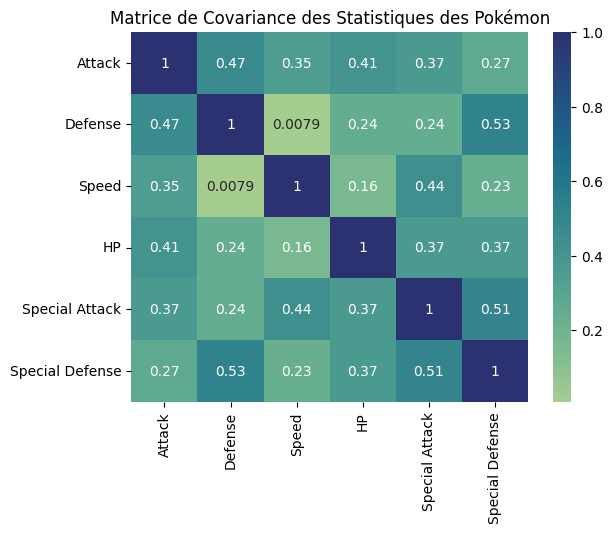

In [20]:
def display_stats_heatmap(df: pd.DataFrame) -> None:
    stat = ['Attack', 'Defense', 'Speed', 'HP', 'Special Attack', 'Special Defense']
# Determination des correlations entre les elements des colonnes de stat
    filtered_df = df[stat].corr()

# Creation de la matrice de correlation (heatmap) et modifications
    sns.heatmap(filtered_df, annot= True, cmap='crest').set_title('Matrice de Covariance des Statistiques des Pokémon')

display_stats_heatmap(pokedex)